In [10]:
import glob

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.manifold import TSNE

In [11]:
def plot_embedding_2D(data, label, title, num_img):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)

    fig = plt.figure()
    markers = ["x", "<", "o", "_", "d"]
    colors = []
    for i in range(num_img):
        if i == 0:
            plt.scatter(
                data[i, 0],
                data[i, 1],
                color=plt.cm.Set1(int(label[i])),
                marker=markers[int(label[i])],
                label="Low-light",
            )
        else:
            plt.scatter(
                data[i, 0],
                data[i, 1],
                color=plt.cm.Set1(int(label[i])),
                marker=markers[int(label[i])],
            )
    for i in range(num_img, num_img * 2):
        if i == num_img:
            plt.scatter(
                data[i, 0],
                data[i, 1],
                color=plt.cm.Set1(int(label[i])),
                marker=markers[int(label[i])],
                label="Normal-light",
            )
        else:
            plt.scatter(
                data[i, 0],
                data[i, 1],
                color=plt.cm.Set1(int(label[i])),
                marker=markers[int(label[i])],
            )
    for i in range(num_img * 2, num_img * 3):
        if i == num_img * 2:
            plt.scatter(
                data[i, 0],
                data[i, 1],
                color=plt.cm.Set1(int(label[i])),
                marker=markers[int(label[i])],
                label="Amp_LE + Pha_L",
            )
        else:
            plt.scatter(
                data[i, 0],
                data[i, 1],
                color=plt.cm.Set1(int(label[i])),
                marker=markers[int(label[i])],
            )
    for i in range(num_img * 3, num_img * 4):
        if i == num_img * 3:
            plt.scatter(
                data[i, 0],
                data[i, 1],
                color=plt.cm.Set1(int(label[i])),
                marker=markers[int(label[i])],
                label="Amp_L + Pha_N",
            )
        else:
            plt.scatter(
                data[i, 0],
                data[i, 1],
                color=plt.cm.Set1(int(label[i])),
                marker=markers[int(label[i])],
            )
    for i in range(num_img * 4, num_img * 5):
        if i == num_img * 4:
            plt.scatter(
                data[i, 0],
                data[i, 1],
                color=plt.cm.Set1(int(label[i])),
                marker=markers[int(label[i])],
                label="Amp_N + Pha_L",
            )
        else:
            plt.scatter(
                data[i, 0],
                data[i, 1],
                color=plt.cm.Set1(int(label[i])),
                marker=markers[int(label[i])],
            )

    plt.xticks([])
    plt.yticks([])
    plt.legend(loc="upper left")
    plt.title(title)
    plt.show()
    return fig

Preparing data......
Beginning......


C:\Users\x1897\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\x1897\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


Finished......


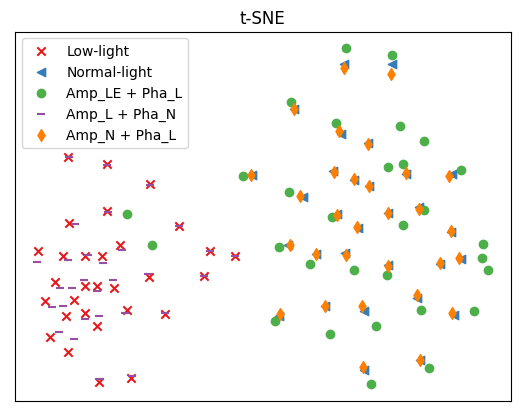

In [12]:
print("Preparing data......")

num_img = 30
img_path = "tsne/Huawei/input"
img_list = glob.glob(img_path + "/*.*")

data = []
data_img = []
data_gt = []
data_image_rev_underAoverP = []
data_image_rev_ampEn = []
data_image_rev_underPoverA = []

for img in img_list:
    gt_path = img.replace("input", "gt")
    image_rev_underAoverP_path = img.replace("input", "amp_l_phase_h")
    image_rev_ampEn_path = img.replace("input", "amp_lk_phase_l")
    image_rev_underPoverA_path = img.replace("input", "amp_h_phase_l")
    img = (
            np.asarray(Image.open(img).convert("L").resize((200, 200), Image.Resampling.LANCZOS))
            / 255.0
    )
    gt = (
            np.asarray(Image.open(gt_path).convert("L").resize((200, 200), Image.Resampling.LANCZOS))
            / 255.0
    )
    image_rev_underAoverP = (
            np.asarray(
                Image.open(image_rev_underAoverP_path)
                .convert("L")
                .resize((200, 200), Image.Resampling.LANCZOS)
            )
            / 255.0
    )
    image_rev_ampEn = (
            np.asarray(
                Image.open(image_rev_ampEn_path)
                .convert("L")
                .resize((200, 200), Image.Resampling.LANCZOS)
            )
            / 255.0
    )
    image_rev_underPoverA = (
            np.asarray(
                Image.open(image_rev_underPoverA_path)
                .convert("L")
                .resize((200, 200), Image.Resampling.LANCZOS)
            )
            / 255.0
    )
    img = img.reshape(1, 40000)
    gt = gt.reshape(1, 40000)
    image_rev_underAoverP = image_rev_underAoverP.reshape(1, 40000)
    image_rev_ampEn = image_rev_ampEn.reshape(1, 40000)
    image_rev_underPoverA = image_rev_underPoverA.reshape(1, 40000)
    data_img.append(img)
    data_gt.append(gt)
    data_image_rev_underAoverP.append(image_rev_underAoverP)
    data_image_rev_ampEn.append(image_rev_ampEn)
    data_image_rev_underPoverA.append(image_rev_underPoverA)

for i in data_img:
    data.append(i)
for i in data_gt:
    data.append(i)
for i in data_image_rev_ampEn:
    data.append(i)
for i in data_image_rev_underAoverP:
    data.append(i)
for i in data_image_rev_underPoverA:
    data.append(i)

data = np.array(data)
data = data.squeeze(1)

label = np.zeros((num_img * 5,))
label[num_img:num_img * 2] = 1
label[num_img * 2:num_img * 3] = 2
label[num_img * 3:num_img * 4] = 3
label[num_img * 4:num_img * 5] = 4

print("Beginning......")
tsne_2D = TSNE(n_components=2, init="pca", random_state=0)
result_2D = tsne_2D.fit_transform(data)
print("Finished......")

fig = plot_embedding_2D(result_2D, label, "t-SNE", num_img)
plt.show()